# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

**Observable Trends from the data:-**
1. There's a very strong correlation between Latitude and Temperature.
2. Windspeed, Cloudiness and Humidity have a very low correlation with the Latitude.
3. Correlation of Temperature with latitude in Northern hemisphere is stronger than that in Southern hemisphere.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import datetime as dt
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(len(cities))

617


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
city_name= []
cloudiness= []
country= []
date= []
humidity= []
lat= []
lng= []
max_temp= []
wind_speed= []
record=1

print("Beginning Data Retreival\n------------------------------------")

for city in cities:
    time.sleep(1.1)
    url=base_url+"appid="+weather_api_key+"&q="+city+"&units="+"imperial"
    response=requests.get(url)
    responsejson=response.json()
    try:
        cname=responsejson["name"]
        city_name.append(cname)
        cloudy=responsejson['clouds']["all"]
        cloudiness.append(cloudy)
        count=responsejson["sys"]["country"]
        country.append(count)
        dt=responsejson["dt"]
        date.append(dt)
        humid=responsejson["main"]["humidity"]
        humidity.append(humid)
        latitude=responsejson["coord"]["lat"]
        lat.append(latitude)
        longitude=responsejson["coord"]["lon"]
        lng.append(longitude)
        temp=responsejson["main"]["temp"]
        max_temp.append(temp)
        windspeed=responsejson["wind"]["speed"]
        wind_speed.append(windspeed)
        city_record=responsejson["name"]
        print(f"Processing Record {record} | {city_record}")
        record+=1
        
    except KeyError:
        print("City not found, skipping to next..")

Beginning Data Retreival
------------------------------------
Processing Record 1 | Poronaysk
Processing Record 2 | Tuktoyaktuk
Processing Record 3 | Santiago
Processing Record 4 | Lebu
Processing Record 5 | Tezu
Processing Record 6 | Trivandrum
Processing Record 7 | Ahipara
City not found, skipping to next..
Processing Record 8 | Coquimbo
Processing Record 9 | Severo-Kuril'sk
Processing Record 10 | Sept-Îles
Processing Record 11 | Port Keats
Processing Record 12 | Gossaigaon
Processing Record 13 | Yellowknife
Processing Record 14 | Nikolskoye
Processing Record 15 | Thibodaux
Processing Record 16 | Tasiilaq
Processing Record 17 | Mar del Plata
Processing Record 18 | Westport
Processing Record 19 | Danjiangkou
Processing Record 20 | Hilo
Processing Record 21 | Bredasdorp
Processing Record 22 | Puerto Ayora
Processing Record 23 | Albany
Processing Record 24 | Yulara
Processing Record 25 | Brownwood
Processing Record 26 | Port Alfred
Processing Record 27 | Ponta Delgada
Processing Record 

City not found, skipping to next..
Processing Record 223 | Katobu
Processing Record 224 | Vila
Processing Record 225 | Mil'kovo
Processing Record 226 | Kamen'-na-Obi
Processing Record 227 | Chennai
City not found, skipping to next..
Processing Record 228 | Tigil'
Processing Record 229 | Hasaki
Processing Record 230 | Paracuru
Processing Record 231 | Ribeira Grande
Processing Record 232 | Mananara
Processing Record 233 | Udachny
Processing Record 234 | Ketchikan
Processing Record 235 | Aylmer
Processing Record 236 | Kaitangata
Processing Record 237 | San Cristobal
Processing Record 238 | Prince Rupert
Processing Record 239 | Juneau
Processing Record 240 | Cherdyn'
Processing Record 241 | Leshukonskoye
Processing Record 242 | Norman Wells
Processing Record 243 | Dolores
Processing Record 244 | Gēdo
Processing Record 245 | Karaton
Processing Record 246 | Rāmhormoz
Processing Record 247 | Airai
Processing Record 248 | Monrovia
Processing Record 249 | Touros
Processing Record 250 | Bay City

Processing Record 449 | Leningradskiy
Processing Record 450 | Vallenar
Processing Record 451 | Cayenne
Processing Record 452 | Stranda
Processing Record 453 | Dakar
Processing Record 454 | Gizo Government Station
Processing Record 455 | Obsharovka
Processing Record 456 | Tres Arroyos
Processing Record 457 | Khovd
Processing Record 458 | Pisz
Processing Record 459 | Lichuan
Processing Record 460 | Carbonia
Processing Record 461 | Bac Lieu
Processing Record 462 | Kidal
Processing Record 463 | Payo
Processing Record 464 | Dassun
Processing Record 465 | Hofn
Processing Record 466 | Palmer
Processing Record 467 | Miandrivazo
Processing Record 468 | Buala
Processing Record 469 | Karakol
Processing Record 470 | Bonavista
Processing Record 471 | Kampot
Processing Record 472 | Grumo Appula
Processing Record 473 | Kuala Lipis
Processing Record 474 | Ardahan
Processing Record 475 | Arlit
Processing Record 476 | Chapais
Processing Record 477 | Isangel
Processing Record 478 | Huambo
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cityweather_df=pd.DataFrame({
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Maximum Temp.":max_temp,
    "Wind Speed":wind_speed})
cityweather_df.to_csv("output/output.csv")
dates=dt.datetime.fromtimestamp(date[0])
cityweather_df

2020-04-10 16:58:34


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temp.,Wind Speed
0,Poronaysk,69,RU,1586552314,92,49.22,143.12,24.85,11.45
1,Tuktoyaktuk,40,CA,1586552316,71,69.45,-133.04,8.60,10.29
2,Santiago,0,CL,1586552272,49,-33.46,-70.65,71.73,5.82
3,Lebu,57,CL,1586552318,80,-37.62,-73.65,60.28,8.08
4,Tezu,0,IN,1586552319,33,27.92,96.17,68.14,3.62
...,...,...,...,...,...,...,...,...,...
564,Oulu,20,FI,1586553028,90,65.00,27.00,27.00,4.14
565,Laguna de Perlas,40,NI,1586553029,66,12.34,-83.67,87.80,4.70
566,Ocós,5,GT,1586553030,49,14.51,-92.19,94.06,11.41
567,Kloulklubed,75,PW,1586553033,88,7.04,134.26,77.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

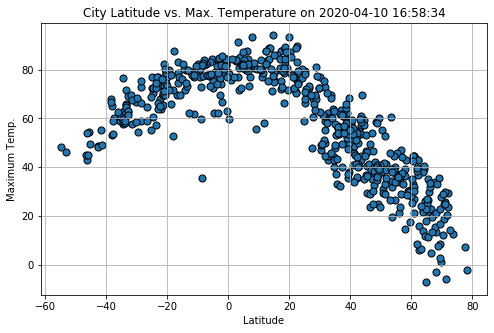

In [17]:
cityweather_df.plot(kind="scatter", y="Maximum Temp." , x="Latitude", title="City Latitude vs. Max. Temperature on "+str(dates), edgecolor="black", figsize=(8,5), grid=True, s=50)
plt.savefig("output/Fig.png")
plt.show()


**Analysis:**
The plot shows that as we move from south pole to the Equator, i.e. Latitude=0, the maximum temperature increases and as we move towards the North pole, the maximum temp. declines. Also, the north pole is colder than the south pole.

#### Latitude vs. Humidity Plot

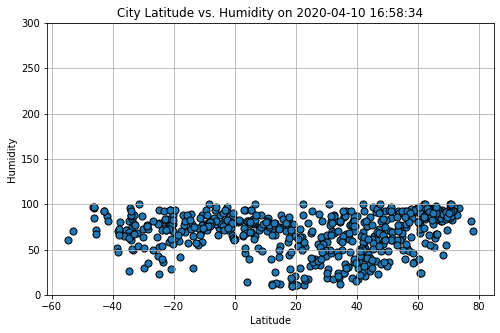

In [18]:
humid=cityweather_df.plot(kind="scatter", y="Humidity" , x="Latitude", title="City Latitude vs. Humidity on "+str(dates), edgecolor="black", figsize=(8,5), grid=True, s=50)
humid.set_ylim(0, 300)
plt.savefig("output/Fig1.png")
plt.show()

**Analysis:**
There isn't a very definitive pattern of Humidity along the latitude, however, it seems to be higher in the northern hemisphere as compared to southern hemisphere. 

#### Latitude vs. Cloudiness Plot

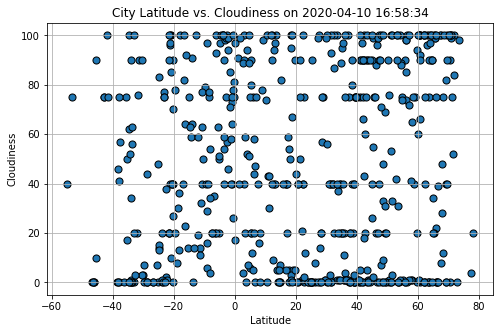

In [19]:
cityweather_df.plot(kind="scatter", y="Cloudiness" , x="Latitude", title="City Latitude vs. Cloudiness on "+str(dates), edgecolor="black", figsize=(8,5), grid=True, s=50)
plt.savefig("output/Fig2.png")
plt.show()

**Analysis:**
It can be inferred from the above plot that cloudiness does not have a correlation with latitude.

#### Latitude vs. Wind Speed Plot

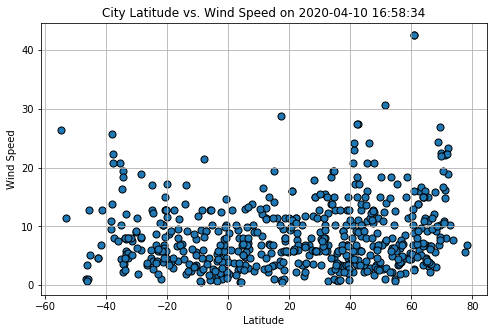

In [20]:
cityweather_df.plot(kind="scatter", y="Wind Speed" , x="Latitude", title="City Latitude vs. Wind Speed on "+str(dates), edgecolor="black", figsize=(8,5), grid=True, s=50)
plt.savefig("output/Fig3.png")
plt.show()

**Analysis:**
Wind speed is higher in northern hemisphere than southern and also that it is lower along the equator as compared to the poles. 

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_func(x,y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values=slope*x+intercept
    annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
    return (annote, regress_values, rvalue)
print(linear_func(northern_df["Latitude"],northern_df["Maximum Temp."] ))

('y=-1.04x + 92.61', 0      41.324806
1      20.247866
4      63.516542
5      83.770409
8      39.803683
         ...    
564    24.884168
565    79.748808
566    77.487959
567    85.270695
568    66.339998
Name: Latitude, Length: 392, dtype: float64, -0.9027740697354585)


In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=cityweather_df
northern_df=northern_df.loc[northern_df["Latitude"]>0]
southern_df=cityweather_df
southern_df=southern_df.loc[southern_df["Latitude"]<0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temp.,Wind Speed
2,Santiago,0,CL,1586552272,49,-33.46,-70.65,71.73,5.82
3,Lebu,57,CL,1586552318,80,-37.62,-73.65,60.28,8.08
6,Ahipara,50,NZ,1586552322,71,-35.17,173.17,61.88,4.45
7,Coquimbo,3,CL,1586552324,64,-29.95,-71.34,68.00,11.41
10,Port Keats,59,AU,1586552327,89,-14.25,129.55,71.49,13.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.82


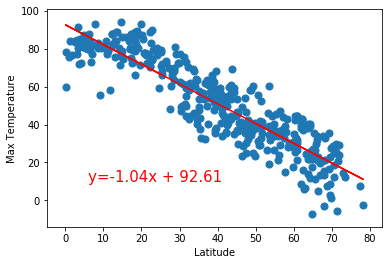

In [26]:
y=northern_df["Maximum Temp."]
x=northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2))
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output/fig4.png")
print("The r-squared is -"+str(round(rvalue**2, 2)))
plt.show()

**Analysis:** 
Maximum Temperature and latitude have a strong negative correlation, as we move towards the pole, the temp. decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.55


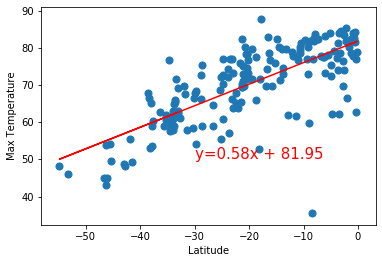

In [27]:
y=southern_df["Maximum Temp."]
x=southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output/fig5.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:**
In the southern hemisphere, correlation between temperature between and latitude is not very strong, they have a correlation of about 0.5 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.07


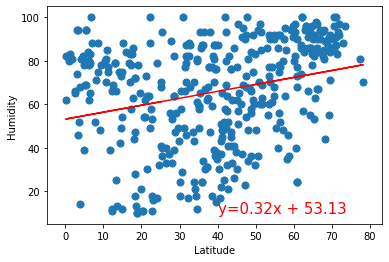

In [28]:
y=northern_df["Humidity"]
x=northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output/fig6.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:**
The correlation between humidity and latitude is weak.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.03


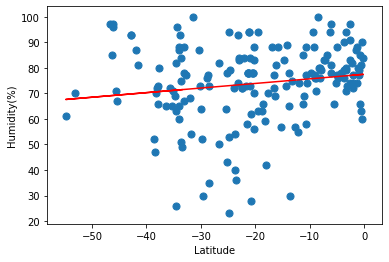

In [29]:
y=southern_df["Humidity"]
x=southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("output/fig7.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:**The correlation between humidity and latitude is weak in both the hemisphere's.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.017


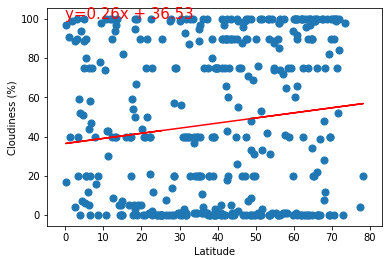

In [30]:
y=northern_df["Cloudiness"]
x=northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (0,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/fig8.png")
print("The r-squared is "+str(round(rvalue**2, 3)))
plt.show()

**Analysis:** A correlation of 0.004 is as good as no correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.11


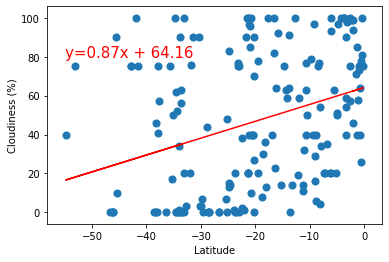

In [31]:
y=southern_df["Cloudiness"]
x=southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (-55,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/fig9.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:** Latitude and cloudiness are not really correlated. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.04


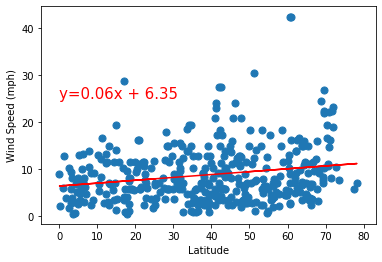

In [32]:
y=northern_df["Wind Speed"]
x=northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/fig10.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:** Correlation between wind speed and latitude also isn't strong. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.08


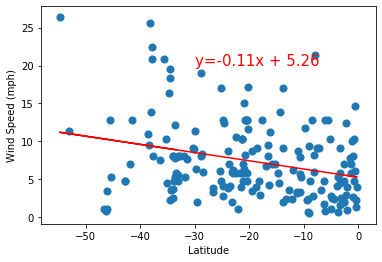

In [33]:
y=southern_df["Wind Speed"]
x=southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values=slope*x+intercept
annote="y="+str(round(slope,2))+"x + " +str(round(intercept,2)) 
plt.plot(x, regress_values, color="r")
plt.scatter(x,y, s=50)
plt.annotate(annote, (-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/fig11.png")
print("The r-squared is "+str(round(rvalue**2, 2)))
plt.show()

**Analysis:** Correlation between wind speed and latitude also isn't strong.